# Importando os dados

Explorando uma base de dados da área de biologia e da biotecnologia para identificar novas drogas mais funcionais com baixa contraposto.

O objetivo é identificar um alvo proteico associado a uma doença e desenvolver uma molécula que possa modular essa proteína auxiliando a desenvolver um algoritmo para prever o MoA de um composto (atividade biológica de uma determinada molécula), dada sua assinatura celular, ajudando os cientistas a avançar no processo de descoberta de medicamentos.

In [1]:
# Importando bilbiotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Banco de dados - Dados_experimentos.zip

In [2]:
# Banco de dados
# Do github
# data_file = 'https://github.com/johnnyhorita/awari-datascience/blob/main/12-Projeto-Final/dados/dados_experimentos.zip?raw=true'
data_file = 'dados\dados_experimentos.zip'

# Importando o banco de dados para o Dataframe
df = pd.read_csv(data_file, compression = 'zip')

### Banco de dados - dados_resultados.csv

In [3]:
# Banco de dados
# Do github
# data_file = 'https://github.com/johnnyhorita/awari-datascience/blob/main/12-Projeto-Final/dados/dados_resultados.csv?raw=true'
data_file_res = 'dados\dados_resultados.csv'

# Importando o banco de dados para o Dataframe
dfr = pd.read_csv(data_file_res)

### Banco de dados - moa_activated.csv

In [4]:
# Banco de dados
# Do github
# data_file = 'https://github.com/johnnyhorita/awari-datascience/blob/main/12-Projeto-Final/dados/moa_activated.csv?raw=true'
data_file_moa = 'dados\moa_activated.csv'

# Importando o banco de dados para o Dataframe
dfa = pd.read_csv(data_file_moa)

### Análise de dados

In [5]:
# Visão incial dos dados
df

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [6]:
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [7]:
df.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


In [8]:
df.shape

(23814, 877)

In [9]:
df.dtypes

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [11]:
df.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [12]:
# Criando lista de colunas
colunas = df.columns

In [13]:
colunas

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [14]:
# Substituindo os hifens do nome das colunas por underscore
nova_coluna = []
for coluna in colunas:
  coluna = coluna.replace('-', '_')
  nova_coluna.append(coluna)
df.columns = nova_coluna
df.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Análise de variáveis tratamento / tempo / dose

In [15]:
# Série
df['tratamento']

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

In [16]:
df['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Com droga - quando  aplicamos alguma droga para a amostra;
Com controle - Utilização de técnicas em que isolamos varíaveis e observamos apenas a variável de interesse.

In [17]:
df['tempo'].unique()

array([24, 72, 48], dtype=int64)

O tempo esta dividido em horas representando dias em que foram administradas as doses das drogas.

In [18]:
df['dose'].unique()

array(['D1', 'D2'], dtype=object)

Dois tipos de doses diferentes, d1 e d2.

In [19]:
df['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Os valores da variável drogas foi codificado para anonimizar os tipos de drogas usadas, para evitar qualquer tipo de viés na análise dos resultados.

In [20]:
# Quantidade de Drogas
df['droga'].unique().shape[0]

3289

In [21]:
df['g_0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

g-0 - Esses valores indicam a expressão de cada gene frente as drogas ou a exposição.

In [22]:
df['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [23]:
df['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [24]:
df['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
e3fe7b417       1
b472193a9       1
866e7bc56       1
7c1e00d49       1
ae2afcf9d       1
Name: droga, Length: 3289, dtype: int64

In [25]:
df['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [26]:
df['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [27]:
df['droga'].value_counts(normalize = True)

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
e3fe7b417    0.000042
b472193a9    0.000042
866e7bc56    0.000042
7c1e00d49    0.000042
ae2afcf9d    0.000042
Name: droga, Length: 3289, dtype: float64

<AxesSubplot:>

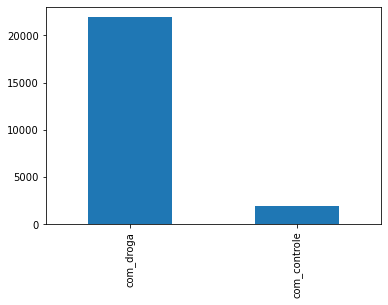

In [28]:
df['tratamento'].value_counts().plot.bar()

Identificamos a quantidade de tratamento com drogas é maior em relação ao tratamento com controle.

<AxesSubplot:>

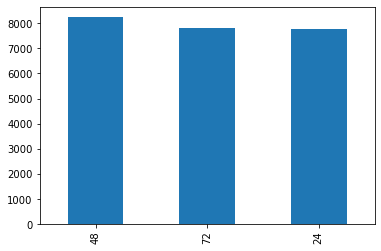

In [29]:
df['tempo'].value_counts().plot.bar()

Maior frequência de observação em quantidade de horas.

In [30]:
valor_tempo = df['tempo'].value_counts(ascending=True)
valor_tempo.sort_index()

24    7772
48    8250
72    7792
Name: tempo, dtype: int64

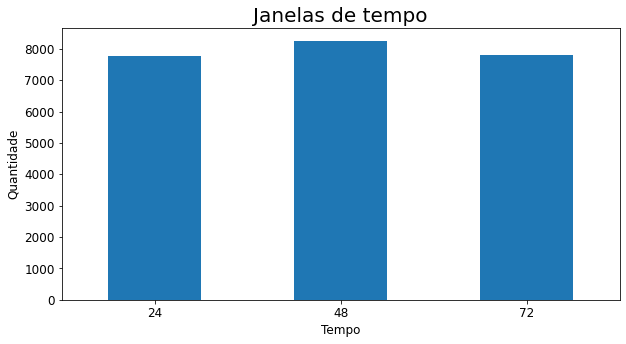

In [31]:
ftsize = 12
plt.figure(figsize=(10, 5))
valor_tempo = df['tempo'].value_counts(ascending=True)
ax = valor_tempo.sort_index().plot.bar()
ax.set_title('Janelas de tempo', fontsize=20)
ax.set_xlabel('Tempo', fontsize=ftsize)
ax.set_ylabel('Quantidade', fontsize=ftsize)
plt.xticks(rotation = 0, fontsize=ftsize)
plt.yticks(fontsize=ftsize)
plt.show()

In [32]:
# Linhas em colunas
pd.crosstab(df['dose'], df['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [33]:
print(f"Total de dados ...................: {len(df['id'])}")
print(f"Quantidade de drogas agrupadas....: {len(df.groupby(['droga']).count()['id'])}")
print(f"Quantidade de tratamento agrupadas: {len(df.groupby(['tratamento']).count()['id'])}")
print(f"Quantidade de drogas / tratamento.: {len(df.groupby(['droga','tratamento']).count()['id'])}")

Total de dados ...................: 23814
Quantidade de drogas agrupadas....: 3289
Quantidade de tratamento agrupadas: 2
Quantidade de drogas / tratamento.: 3289


In [34]:
# Estudo de tratamento com drogas
df.query('tratamento == "com_droga"').value_counts('droga')

droga
87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
            ... 
d778ccd51      1
547f80a41      1
aeb28b1ee      1
627d2d158      1
89ced6383      1
Length: 3288, dtype: int64

In [35]:
# Estudo de tratamento com controle
# Identificamos que com controle apenas uma droga, dessa forma indica que os estudos estão focados apenas para uma droga
df.query('tratamento == "com_controle"').value_counts('droga')

droga
cacb2b860    1866
dtype: int64

In [36]:
df.query('droga == "cacb2b860"').value_counts('tratamento')

tratamento
com_controle    1866
dtype: int64

In [37]:
# Criação de dataframe normalizado, retirando os valores da expressão gênica inferiores a 0, diminuindo o intervalo da expressão.
# Vamos fazer uma consulta nos nossos dados, da seguinte maneira:
    
dados_filtrados = df[df['g_0'] > 0]
dados_filtrados.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


In [38]:
dados_filtrados = df.query('g_0 > 0')
dados_filtrados.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


In [39]:
df

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [40]:
# Renomear a coluna droga para composto 
mapa = {'droga': 'composto'}
df.rename(columns=mapa, inplace=True)

In [41]:
# Quantidade de compostos
df['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
e3fe7b417       1
b472193a9       1
866e7bc56       1
7c1e00d49       1
ae2afcf9d       1
Name: composto, Length: 3289, dtype: int64

Devido a quantidade de compostos Para facilitar na visualização do histogramas, elenquei os 5 compostos que mais aparecem.

In [42]:
lst_compostos = df['composto'].value_counts().index[0:5]

In [43]:
lst_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [44]:
# Filtra o dataframe com a lista de compostos 
df.query('composto in @lst_compostos')

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


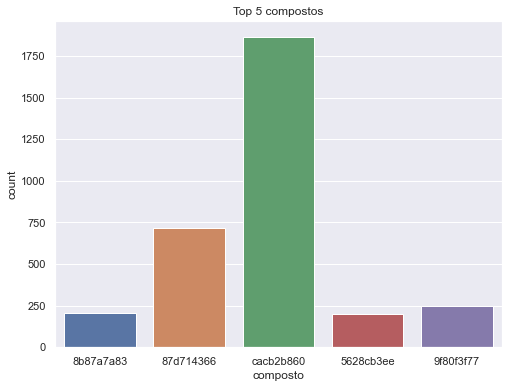

In [45]:
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=df.query('composto in @lst_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

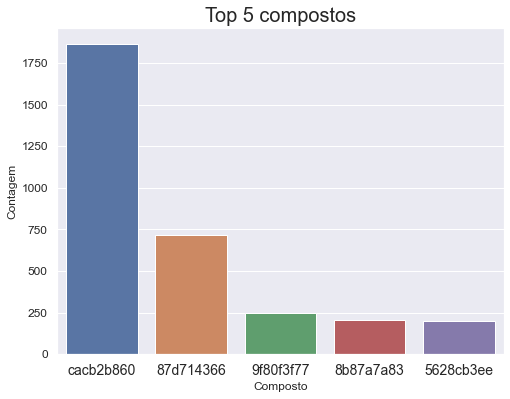

In [46]:
sns.set()
          
plt.rc('axes', titlesize=20)     # O tamanho da fonte do título
plt.rc('axes', labelsize=12)    # O tamanho da fonte dos eixos x e y
plt.rc('xtick', labelsize=14)    # O tamanho da fonte dos números e texto no eixo x
plt.rc('ytick', labelsize=12)    # O tamanho da fonte dos números e texto no eixo y
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=df.query('composto in @lst_compostos'), order=lst_compostos)
ax.set_title('Top 5 compostos')
ax.set_ylabel('Contagem')
ax.set_xlabel('Composto')
plt.show()


### Análise da variável Gene

In [47]:
print(f"Quantidade de genes ..........: {len(df['g_0'].unique())}")
print(f"Valor mínimo exposição do Gene: {df['g_0'].min()}")
print(f"Valor máximo exposição do Gene: {df['g_0'].max()}")


Quantidade de genes ..........: 14367
Valor mínimo exposição do Gene: -5.513
Valor máximo exposição do Gene: 10.0


<AxesSubplot:>

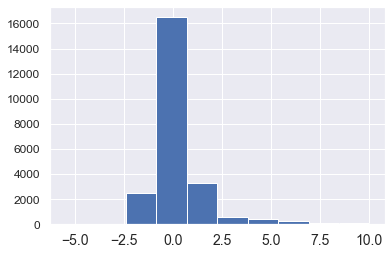

In [48]:
df['g_0'].hist()

<AxesSubplot:>

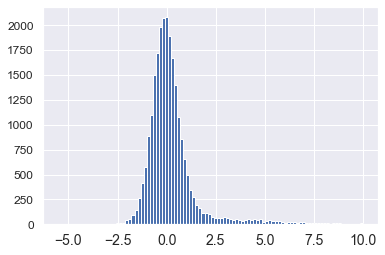

In [49]:
# Definição do bins para facilitar na divisão e visualização
# Percebemos que a forma se aproxima bastante de uma curva normal.
df['g_0'].hist(bins = 100)

<AxesSubplot:xlabel='g_0', ylabel='Count'>

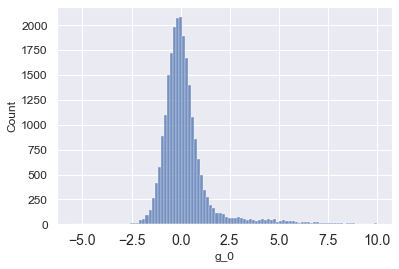

In [50]:
sns.histplot(data=df['g_0'],bins=100) # Versão com o Seaborn

<AxesSubplot:>

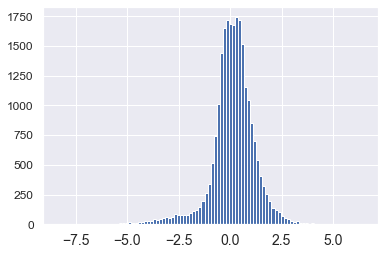

In [51]:
# Avaliação de outros Genes
df['g_9'].hist(bins = 100)

<AxesSubplot:xlabel='g_8', ylabel='Count'>

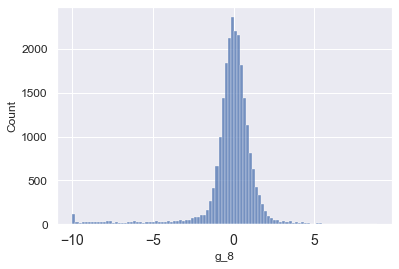

In [52]:
sns.histplot(data=df['g_8'],bins=100) # Versão com o Seaborn

<AxesSubplot:>

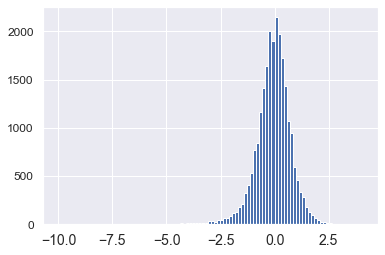

In [53]:
df['g_19'].hist(bins = 100)

<AxesSubplot:xlabel='g_19', ylabel='Count'>

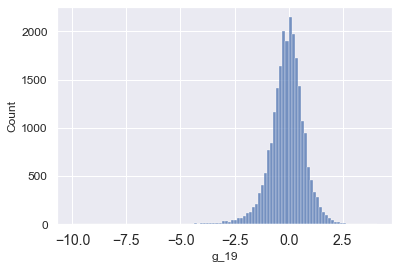

In [54]:
sns.histplot(data=df['g_19'],bins=100) # Versão com o Seaborn

<AxesSubplot:xlabel='g_0', ylabel='g_19'>

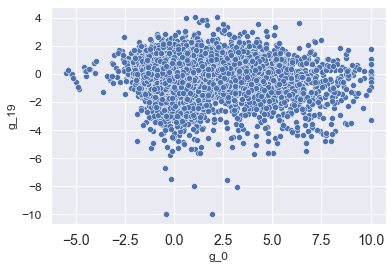

In [55]:
# O gráfico de dispersão para apurar se há relação de causa e efeito entre os genes.
# Não podemos afirmar que uma variável afeta a outra, podemos apenas definir se há relação entre elas e qual a intensidade

sns.scatterplot(x='g_0', y = 'g_19', data=df)

<AxesSubplot:xlabel='g_0', ylabel='g_8'>

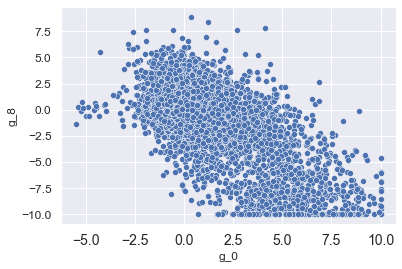

In [56]:
sns.scatterplot(x='g_0', y = 'g_8', data=df)

Neste grafico percebemos uma nuvem de pontos cartesianos que  desenhar melhor um padrão: conforme o g-0 aumenta, o valor de g-8 diminui. Aparentemente, a relação entre essas duas variáveis desenha uma curva com inclinação negativa.

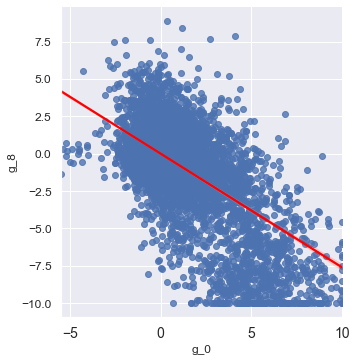

In [57]:
sns.lmplot(data=df, x='g_0', y='g_8', line_kws={'color': 'red'})

Observando o gráfico, podemos concluir a nossa hipótese inicial, mas não é suficiente para finalizarmos a análise.

In [58]:
df.describe()

,tempo,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [59]:
df.loc[:,'g_0':'g_771'].describe()

,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,...,g_762,g_763,g_764,g_765,g_766,g_767,g_768,g_769,g_770,g_771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


<AxesSubplot:>

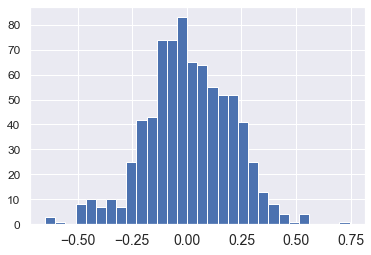

In [60]:
# Apresentação gráfica transposta.
df.loc[:,'g_0':'g_771'].describe().T['mean'].hist(bins=30)

<AxesSubplot:xlabel='mean', ylabel='Count'>

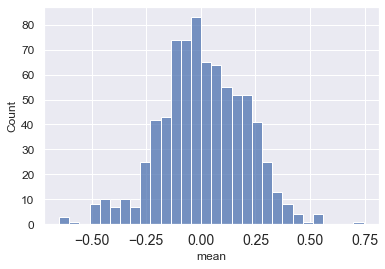

In [61]:
sns.histplot(data=df.loc[:,'g_0':'g_771'].describe().T['mean'],bins=30) # Versão com o Seaborn

<AxesSubplot:>

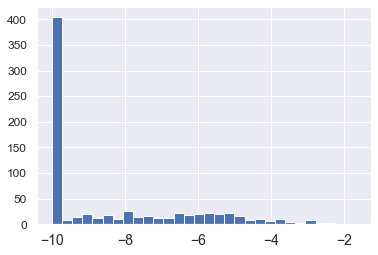

In [62]:
df.loc[:,'g_0':'g_771'].describe().T['min'].hist(bins=30)

<AxesSubplot:xlabel='min', ylabel='Count'>

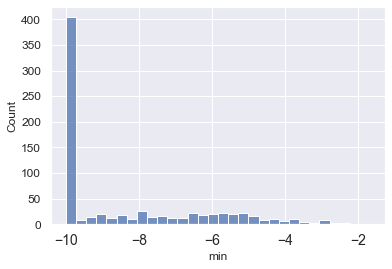

In [63]:
sns.histplot(data=df.loc[:,'g_0':'g_771'].describe().T['min'],bins=30) # Versão com o Seaborn

<AxesSubplot:>

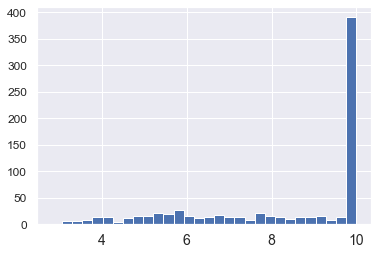

In [64]:
df.loc[:,'g_0':'g_771'].describe().T['max'].hist(bins=30)

<AxesSubplot:xlabel='max', ylabel='Count'>

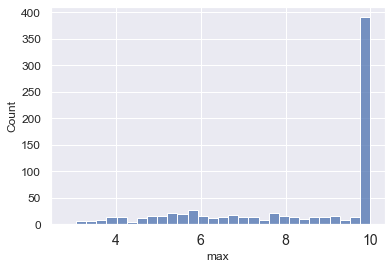

In [65]:
sns.histplot(data=df.loc[:,'g_0':'g_771'].describe().T['max'],bins=30) # Versão com o Seaborn

<AxesSubplot:>

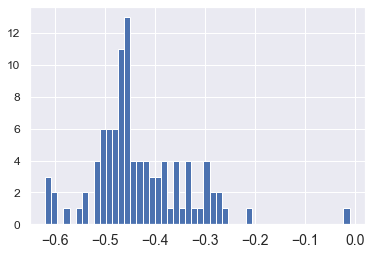

In [66]:
# Restringindo alguns dados para análise dos genes
df.loc[:,'c_0':'c_99'].describe().T['mean'].hist(bins=50)

<AxesSubplot:xlabel='mean', ylabel='Count'>

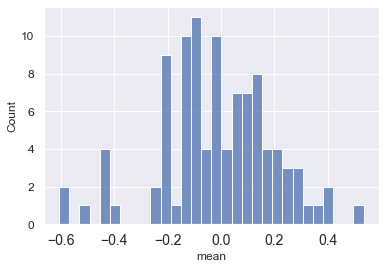

In [67]:
sns.histplot(data=df.loc[:,'g_0':'g_99'].describe().T['mean'],bins=30) # Versão com o Seaborn

<AxesSubplot:xlabel='g_0'>

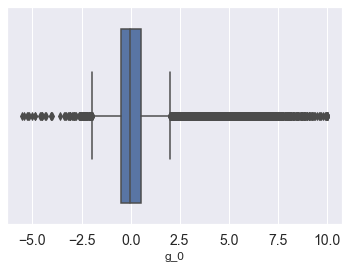

In [68]:
# Identificação das métricas estatísticas
# O boxplot apresenta
# A caixa no meio onde podemos identificar a mediana (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda)
# Outliers (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos)
# a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - primeiro quartil (25%) 
# e terceiro quartil (75%))
# máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal)

sns.boxplot(x='g_0' , data=df)

<AxesSubplot:xlabel='tratamento', ylabel='g_0'>

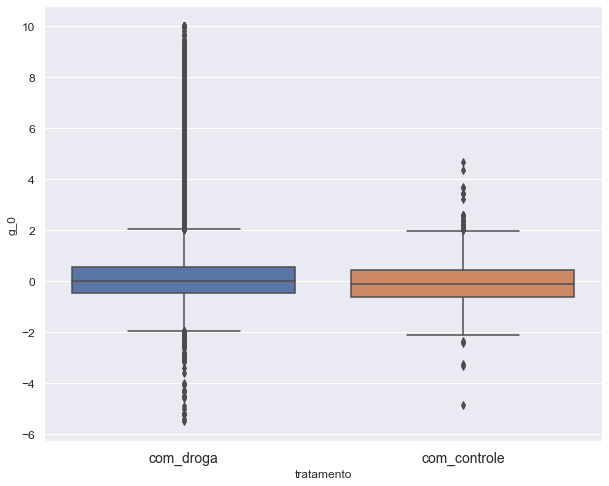

In [69]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g_0', x='tratamento' , data=df)

<AxesSubplot:xlabel='dose', ylabel='g_0'>

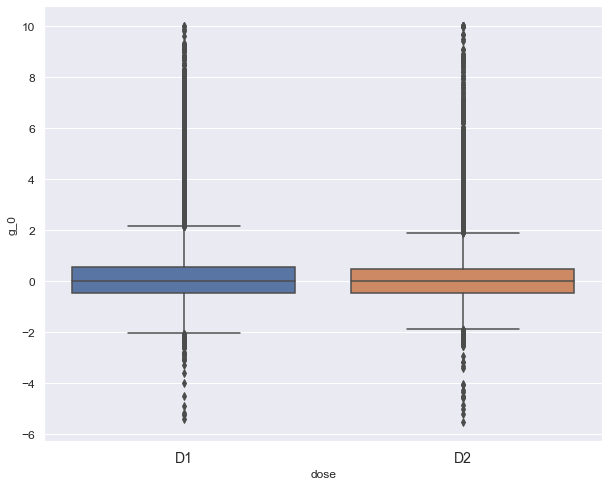

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g_0', x='dose' , data=df)

<AxesSubplot:xlabel='dose', ylabel='g_0'>

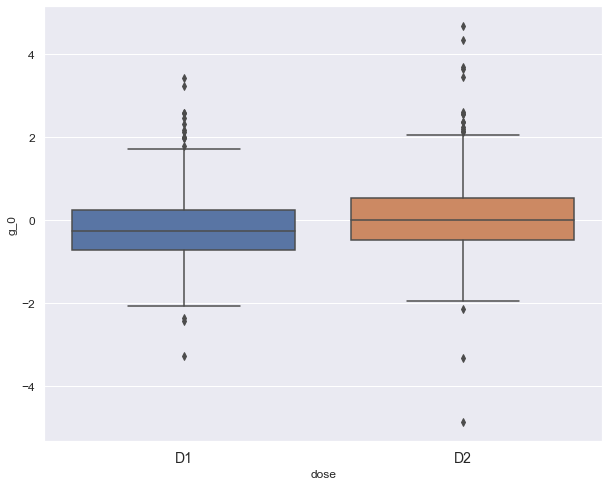

In [71]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g_0', x='dose' , data=df.query('composto == "cacb2b860"'))

<AxesSubplot:xlabel='dose', ylabel='c_0'>

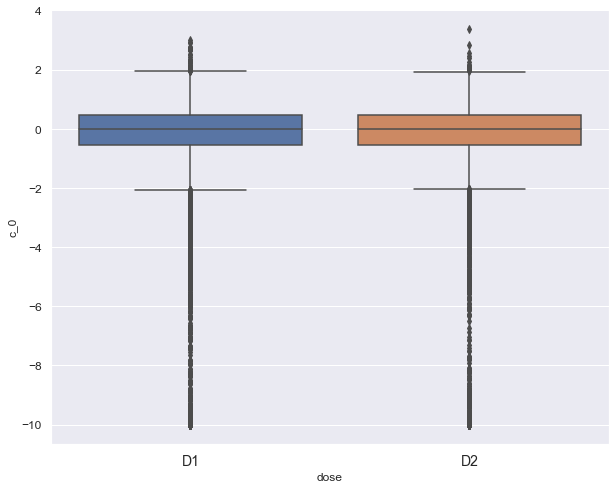

In [72]:
plt.figure(figsize=(10,8))
sns.boxplot(y='c_0', x='dose' , data=df)

<AxesSubplot:xlabel='tempo', ylabel='c_15'>

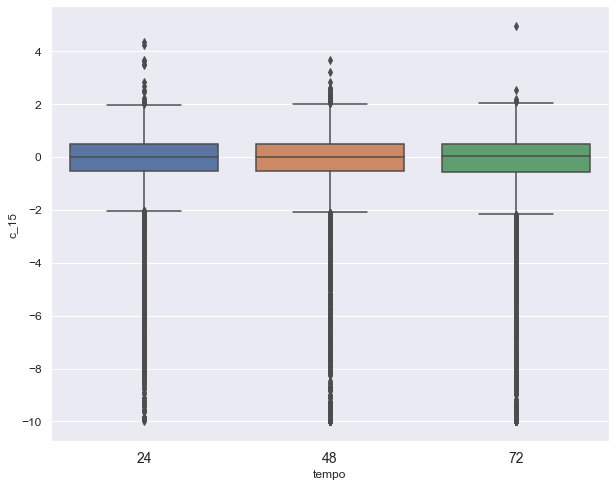

In [73]:
plt.figure(figsize=(10,8))
sns.boxplot(y='c_15', x='tempo' , data=df)

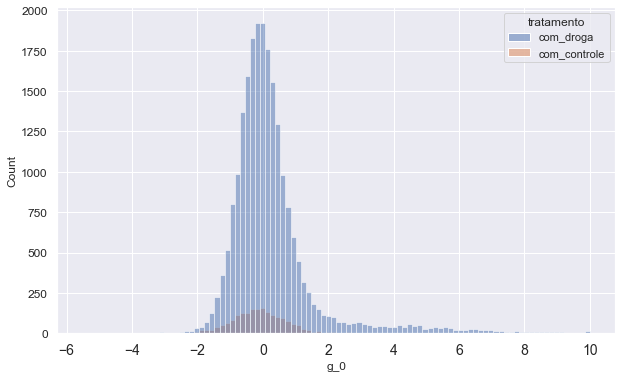

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='g_0', bins=100, hue='tratamento')
plt.show()

### Análise da variável Tempo

In [75]:
# Transformando linhas em colunas
pd.crosstab(df['dose'], df['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [76]:
# Relacionamento da variável tempo com o tratamento
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [77]:
# Normalizando as informações
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [78]:
# Versão com o crosstab normalizada
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [79]:
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'], values=df['g_0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [80]:
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'], values=df['g_0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [81]:
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'], values=df['g_0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [82]:
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'], values=df['g_0'], aggfunc='last')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           0.0465     0.6660
     48           1.1120     0.1420
     72          -0.6204    -0.8598
D2   24           0.7200    -1.3260
     48           0.3942    -0.1150
     72          -0.1051    -0.4330

In [83]:
#Agrupa os dados por dose e por tempo e faz a contagem para os dados com_droga
com_droga = df[df['tratamento']=='com_droga'].groupby(['dose','tempo']).count()['tratamento']

In [84]:
com_droga

dose  tempo
D1    24       3585
      48       4011
      72       3600
D2    24       3581
      48       3591
      72       3580
Name: tratamento, dtype: int64

In [85]:
#Agrupa os dados por dose e por tempo e faz a contagem para os dados com_controle
com_controle = df[df['tratamento']=='com_controle'].groupby(['dose','tempo']).count()['tratamento'] 

In [86]:
com_controle

dose  tempo
D1    24       301
      48       343
      72       307
D2    24       305
      48       305
      72       305
Name: tratamento, dtype: int64

In [87]:
#Juntando tudo em um único dataframe
concatenado = pd.concat([com_controle,com_droga],axis=1) 

In [88]:
#mudando o nome das colunas
concatenado.columns = ['com_controle','com_droga']

In [89]:
concatenado

com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [90]:
# Normalizando os dados
concatenado.div(concatenado.sum(axis=1),axis=0) 

com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [91]:
pd.melt(df,id_vars=['dose'],value_vars=['g_0'])

,dose,variable,value
0,D1,g_0,1.0620
1,D1,g_0,0.0743
2,D1,g_0,0.6280
3,D1,g_0,-0.5138
4,D2,g_0,-0.3254
...,...,...,...
23809,D2,g_0,0.1394
23810,D2,g_0,-1.3260
23811,D2,g_0,0.3942
23812,D1,g_0,0.6660


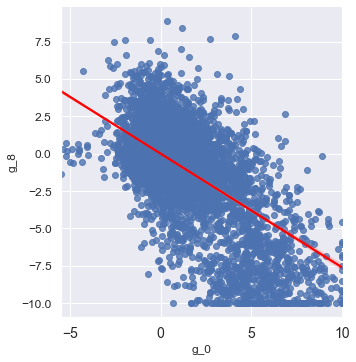

In [92]:
sns.lmplot(data=df, x='g_0', y='g_8', line_kws={'color': 'red'})

Apesar de termos uma linha de tendência para a relação entre os dados dos genes g-0 e g-8, 
não existem filtros para a dosagem, o tratamento e o tempo. 

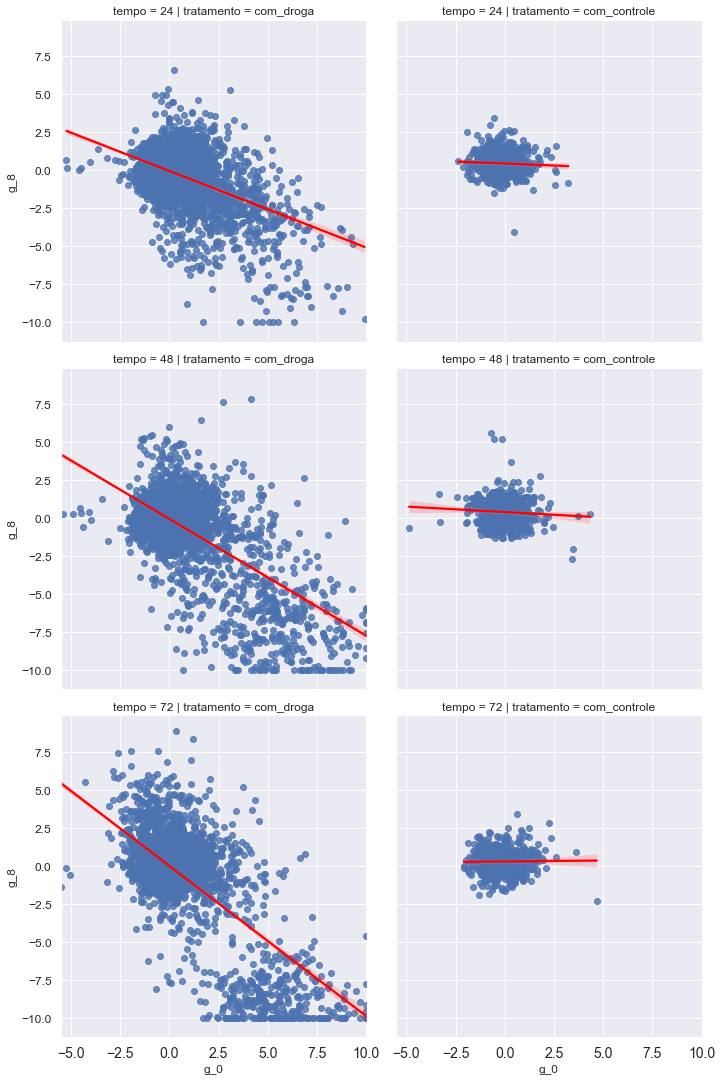

In [93]:
# Para uma análise mais completa separamos o conjunto de dados. 
sns.lmplot(data=df, x='g_0', y='g_8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

In [94]:
# Analisando outras correlações
df.loc[:,'g_0':'g_771'].corr()

,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,...,g_762,g_763,g_764,g_765,g_766,g_767,g_768,g_769,g_770,g_771
g_0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g_1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g_2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g_3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g_4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g_768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g_769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g_770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


Para analisar um dataframe com grandes quantidades de variaveis plotamos um mapa de calor para identificar a correlação entre as variáveis.

In [95]:
# Definição da dataframe auxiliar de correlações
corr = df.loc[:,'g_0':'g_50'].corr()

<AxesSubplot:>

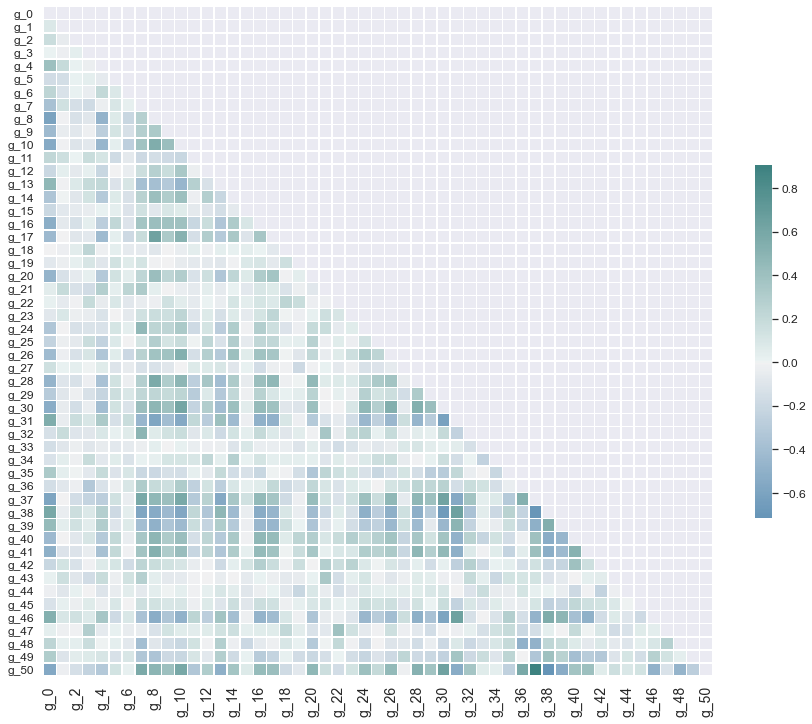

In [96]:
# Gerar máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Preparar a figura matplotlib
f, ax = plt.subplots(figsize=(15, 13))

# Gerar um mapa de cores personalizado 
cmap = sns.diverging_palette(600, 550, as_cmap=True)

# Desenha o mapa de calor 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [97]:
corr_genes = df.loc[:,'g_0':'g_50'].corr()

In [98]:
# Gera uma matriz de 1 (True) no tamanho do dataframe de correlação
np.ones_like(corr_genes, dtype=bool)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [99]:
# Gera uma mascara para o triangulo superior
mask = np.triu(np.ones_like(corr_genes, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [100]:
# Cria uma paleta de cores
cmap = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True)

<AxesSubplot:>

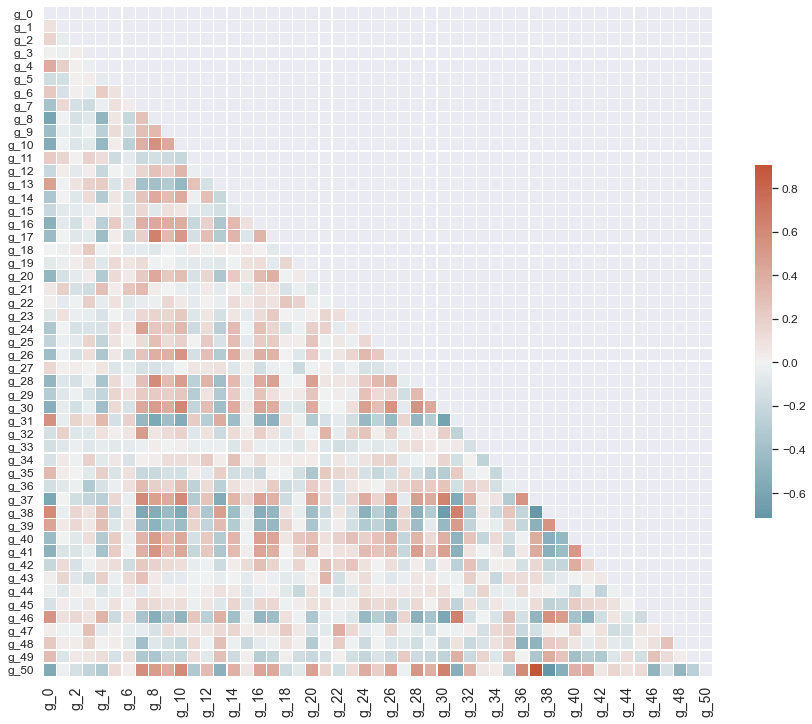

In [101]:
# Desenha um mapa de calor aplicando a mascara e utilizando a paleta de cores.
plt.figure(figsize=(15, 13))

sns.heatmap(corr_genes, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})

### Análise da correlação entre as variável G_0 e C_99

In [102]:
cgcorr = df.loc[:,'g_0':'c_99'].corr()

In [103]:
corr_celular_gene = cgcorr.loc['g_0':'g_50','c_0':'c_50']

<AxesSubplot:>

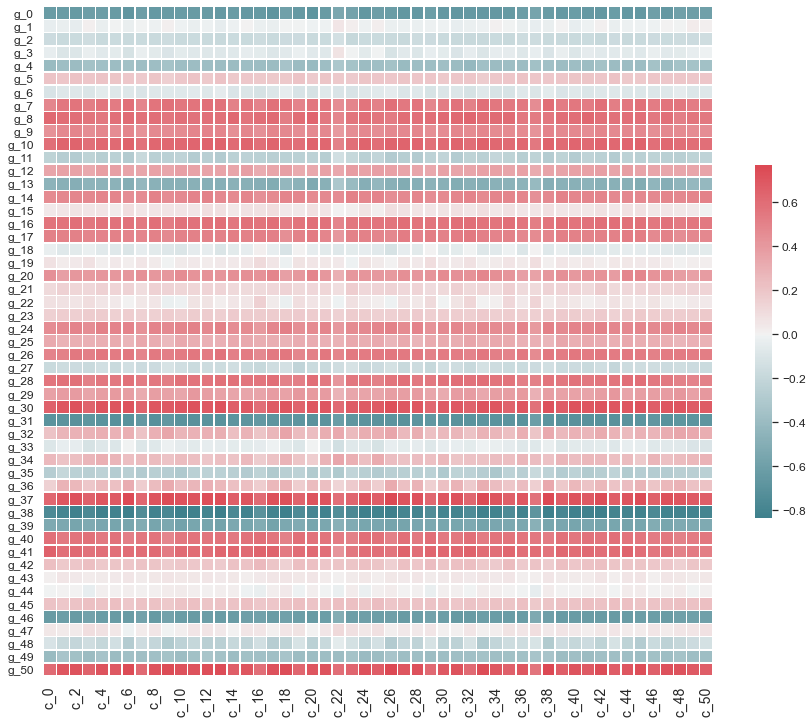

In [104]:
# Preparar a figura matplotlib
f, ax = plt.subplots(figsize=(15, 13))

# Gerar um mapa de cores personalizado 
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Desenha o mapa de calor 
sns.heatmap(corr_celular_gene, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

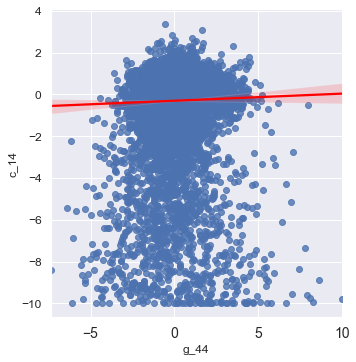

In [105]:
sns.lmplot(data=df, x='g_44', y='c_14', line_kws={'color': 'red'})

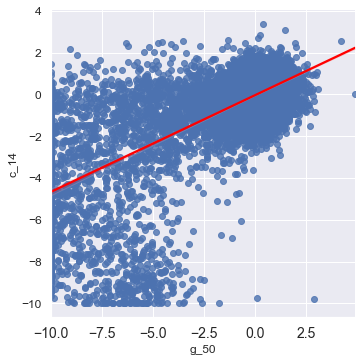

In [106]:
sns.lmplot(data=df, x='g_50', y='c_14', line_kws={'color': 'red'})

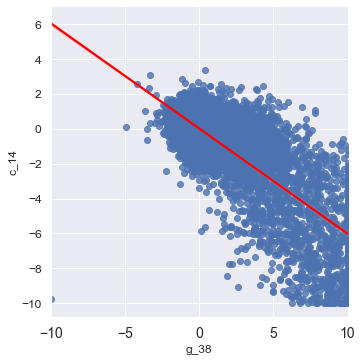

In [107]:
sns.lmplot(data=df, x='g_38', y='c_14', line_kws={'color': 'red'})

In [108]:
dfr

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Excluindo coluna Unnamed do dataframe
# dfa = dfa.drop("Unnamed: 0",axis=1)

In [113]:
dfa

,id,n_moa,is_Activated
0,id_000644bb2,1,True
1,id_000779bfc,0,False
2,id_000a6266a,3,True
3,id_0015fd391,0,False
4,id_001626bd3,1,True
...,...,...,...
23809,id_fffb1ceed,1,True
23810,id_fffb70c0c,1,True
23811,id_fffc1c3f4,0,False
23812,id_fffcb9e7c,1,True


In [114]:
# Inclui as colunas de tempo e tratamento_com_controle no dataframe MOA_Activated
dfa['24'] = (df['tempo'] == 24)
dfa['48'] = (df['tempo'] == 48)
dfa['72'] = (df['tempo'] == 72)
dfa['tratamento_com_controle'] = (df['tratamento'] == 'com_controle')

In [115]:
dfa

,id,n_moa,is_Activated,24,48,72,tratamento_com_controle
0,id_000644bb2,1,True,True,False,False,False
1,id_000779bfc,0,False,False,False,True,False
2,id_000a6266a,3,True,False,True,False,False
3,id_0015fd391,0,False,False,True,False,False
4,id_001626bd3,1,True,False,False,True,False
...,...,...,...,...,...,...,...
23809,id_fffb1ceed,1,True,True,False,False,False
23810,id_fffb70c0c,1,True,True,False,False,False
23811,id_fffc1c3f4,0,False,False,True,False,True
23812,id_fffcb9e7c,1,True,True,False,False,False


In [116]:
# Combinação dos dataframes de Experimento e Resultados
pd.merge(df, dfa, on='id')

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,...,c_96,c_97,c_98,c_99,n_moa,is_Activated,24,48,72,tratamento_com_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,1,True,True,False,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,False,False,False,True,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,True,False,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,True,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.0631,0.9171,0.5258,0.4680,1,True,True,False,False,False
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,-0.2084,-0.1224,-0.2715,0.3689,1,True,True,False,False,False
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.2256,0.7592,0.6656,0.3808,0,False,False,True,False,True
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,0.1732,0.7015,-0.6290,0.0740,1,True,True,False,False,False


In [117]:
# Criação do dataframe combinado dfc com dataframe df e dfa
# df  = Dados Experimento
# dfr = Dados resultado
# dfa = MoA ativados (Resultado da EDA do dataframe dfr)
dfc = pd.merge(df, dfa, on='id')

In [118]:
dfc.query('tratamento == "com_controle"')['is_Activated'].value_counts()

False    1866
Name: is_Activated, dtype: int64

In [119]:
# Drogas que ativaram o mecanismo de ação 
dfc.query('tratamento == "com_droga"')['is_Activated'].value_counts()

True     14447
False     7501
Name: is_Activated, dtype: int64

In [120]:
# Outras formas de agrupar os resultados
dfc.groupby(['tratamento','is_Activated']).size()

tratamento    is_Activated
com_controle  False            1866
com_droga     False            7501
              True            14447
dtype: int64

In [121]:
# Outras formas de agrupar os resultados
dfc[['id','tratamento','is_Activated']].groupby(['tratamento','is_Activated']).agg(['count'])

id
                           count
tratamento   is_Activated       
com_controle False          1866
com_droga    False          7501
             True          14447

In [122]:
dfc_composto = dfc['composto'].value_counts().index[:3]

In [123]:
dfc_composto

Index(['cacb2b860', '87d714366', '9f80f3f77'], dtype='object')

<AxesSubplot:xlabel='composto', ylabel='g_0'>

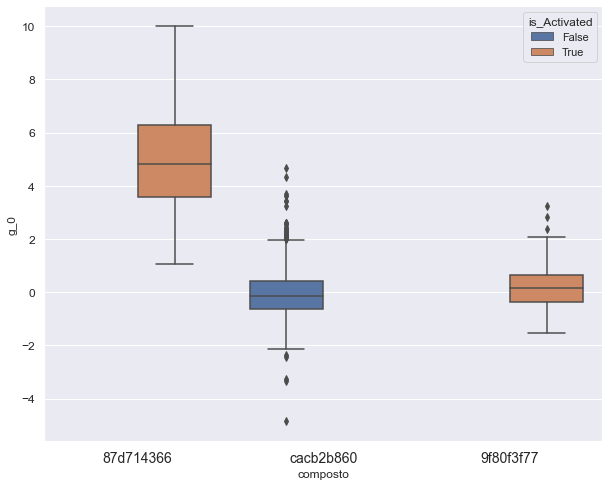

In [124]:
plt.figure (figsize=(10,8))
sns.boxplot(data = dfc.query('composto in @dfc_composto'), y = 'g_0', x = 'composto', hue = 'is_Activated' )

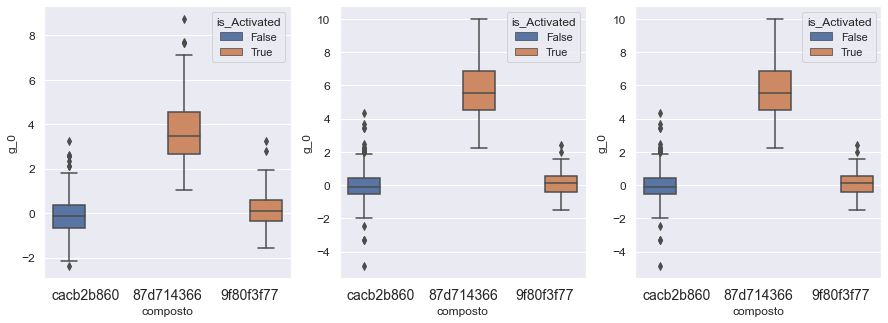

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data = dfc.query('composto in @dfc_composto & tempo == 24'), y= 'g_0', x='composto',
            hue='is_Activated', order=dfc_composto, ax=ax1)

sns.boxplot(data = dfc.query('composto in @dfc_composto & tempo == 48'), y= 'g_0', x='composto',
            hue='is_Activated', order=dfc_composto, ax=ax2)

sns.boxplot(data = dfc.query('composto in @dfc_composto & tempo == 48'), y= 'g_0', x='composto',
            hue='is_Activated', order=dfc_composto, ax=ax3)

plt.show()

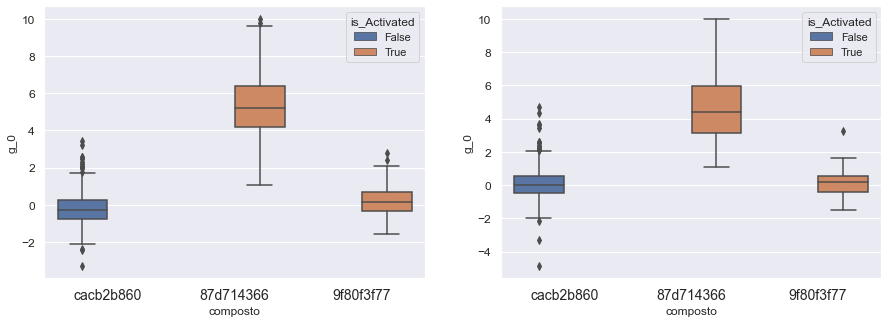

In [126]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data = dfc.query('composto in @dfc_composto & dose == "D1"'), y= 'g_0', x='composto',
            hue='is_Activated', order=dfc_composto, ax=ax1)

sns.boxplot(data = dfc.query('composto in @dfc_composto & dose == "D2"'), y= 'g_0', x='composto',
            hue='is_Activated', order=dfc_composto, ax=ax2)

plt.show()

In [127]:
# Exportando resultado para planilha
dfc.to_csv('dados\dados_combinados.csv', index=False)